In [106]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [127]:
df = pd.read_csv('customer_dataset.csv')
df

,CustomerID,Gender,Age,Marital,address,Retired,Annual Income (k$),Spending Score (1-100)
0,1,Male,20,0,9,0,34,13
1,2,Male,20,0,7,0,19,15
2,3,Female,19,0,24,0,2,31
3,5,Female,25,0,12,0,7,28
4,6,Female,24,1,9,0,36,9
...,...,...,...,...,...,...,...,...
995,997,Female,59,0,0,0,42,88
996,998,Female,72,0,2,1,46,87
997,999,Male,61,0,40,1,43,93
998,1000,Male,66,0,18,1,47,91


In [128]:
df.shape

(1000, 8)

In [129]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Marital                   0
address                   0
Retired                   0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [130]:
## Visulaization

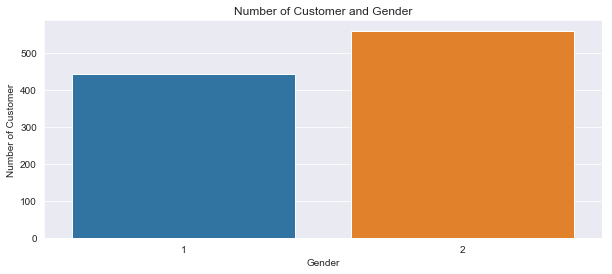

In [194]:
genders = df.Gender.value_counts()
sns.set_style("darkgrid")
plt.figure(figsize=(10,4))
plt.title("Number of Customer and Gender")
plt.xlabel("Gender")
plt.ylabel("Number of Customer")
sns.barplot(x=genders.index, y=genders.values)
plt.show()

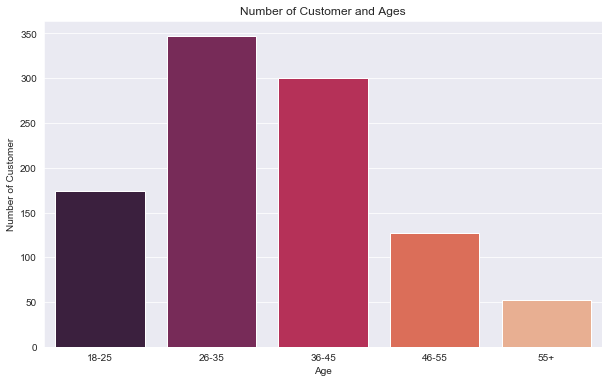

In [132]:
age18_25 = df.Age[(df.Age <= 25) & (df.Age >= 18)]
age26_35 = df.Age[(df.Age <= 35) & (df.Age >= 26)]
age36_45 = df.Age[(df.Age <= 45) & (df.Age >= 36)]
age46_55 = df.Age[(df.Age <= 55) & (df.Age >= 46)]
age55above = df.Age[df.Age >= 56]

x = ["18-25","26-35","36-45","46-55","55+"]
y = [len(age18_25.values),len(age26_35.values),len(age36_45.values),len(age46_55.values),len(age55above.values)]

plt.figure(figsize=(10,6))
sns.barplot(x=x, y=y, palette="rocket")
plt.title("Number of Customer and Ages")
plt.xlabel("Age")
plt.ylabel("Number of Customer")
plt.show()

In [133]:
# I continued with making a bar plot to visualize 
# the number of customers according to their spending scores.
# The majority of the customers have spending score in the range 41–60.

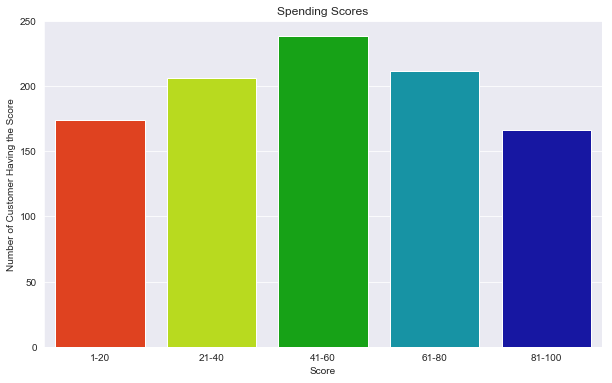

In [135]:

ss1_20 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >= 1) & (df["Spending Score (1-100)"] <= 20)]
ss21_40 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >= 21) & (df["Spending Score (1-100)"] <= 40)]
ss41_60 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >= 41) & (df["Spending Score (1-100)"] <= 60)]
ss61_80 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >= 61) & (df["Spending Score (1-100)"] <= 80)]
ss81_100 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >= 81) & (df["Spending Score (1-100)"] <= 100)]

ssx = ["1-20", "21-40", "41-60", "61-80", "81-100"]
ssy = [len(ss1_20.values), len(ss21_40.values), len(ss41_60.values), len(ss61_80.values), len(ss81_100.values)]

plt.figure(figsize=(10,6))
sns.barplot(x=ssx, y=ssy, palette="nipy_spectral_r")
plt.title("Spending Scores")
plt.xlabel("Score")
plt.ylabel("Number of Customer Having the Score")
plt.show()

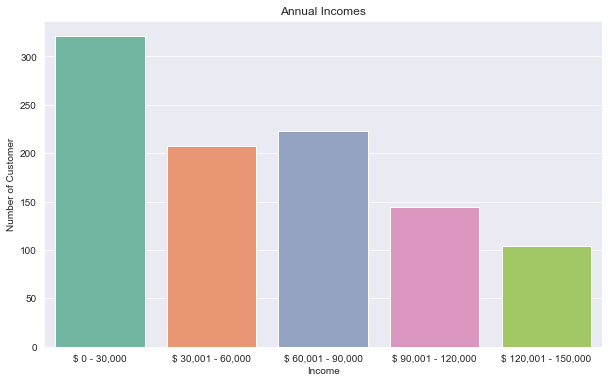

In [136]:
ai0_30 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 0) & (df["Annual Income (k$)"] <= 30)]
ai31_60 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 31) & (df["Annual Income (k$)"] <= 60)]
ai61_90 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 61) & (df["Annual Income (k$)"] <= 90)]
ai91_120 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 91) & (df["Annual Income (k$)"] <= 120)]
ai121_150 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 121) & (df["Annual Income (k$)"] <= 150)]

aix = ["$ 0 - 30,000", "$ 30,001 - 60,000", "$ 60,001 - 90,000", "$ 90,001 - 120,000", "$ 120,001 - 150,000"]
aiy = [len(ai0_30.values), len(ai31_60.values), len(ai61_90.values), len(ai91_120.values), len(ai121_150.values)]

plt.figure(figsize=(10,6))
sns.barplot(x=aix, y=aiy, palette="Set2")
plt.title("Annual Incomes")
plt.xlabel("Income")
plt.ylabel("Number of Customer")
plt.show()

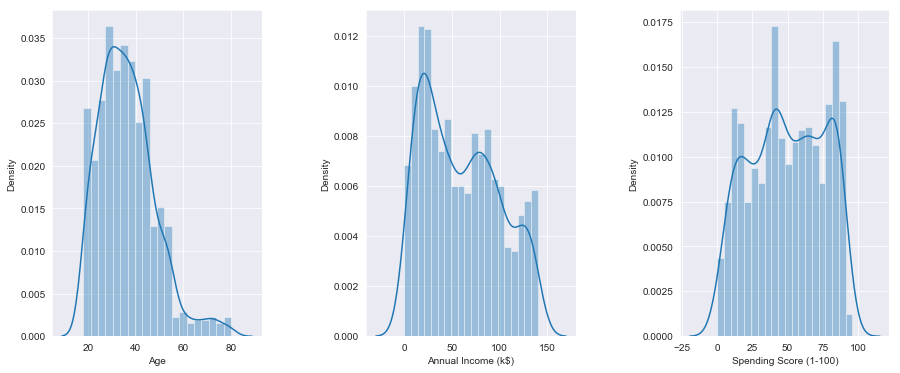

In [137]:
#Density estimation of values using distplot
plt.figure(1 , figsize = (15 , 6))
feature_list = ['Age','Annual Income (k$)', "Spending Score (1-100)"]
feature_listt = ['Age','Annual Income (k$)', "Spending Score (1-100)"]
pos = 1 
for i in feature_list:
    plt.subplot(1 , 3 , pos)
    plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
    sns.distplot(df[i], bins=20, kde = True)
    pos = pos + 1
plt.show()

In [ ]:
# -----------------------------------------visualization end--------------------------------------------------#

In [ ]:
# clustering on basis of AGE factor

In [138]:
X = df.iloc[:,[2,7]].values

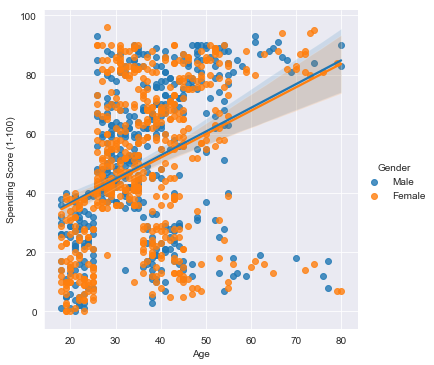

In [140]:
sns.lmplot(x = "Age", y = "Spending Score (1-100)", data = df, hue = "Gender")

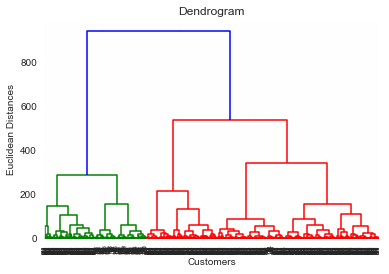

In [141]:
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X,method='ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distances')
plt.show()

In [142]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters=5,affinity='euclidean',linkage='ward')
Y_hc = hc.fit_predict(X)
# Y_hc

No handles with labels found to put in legend.


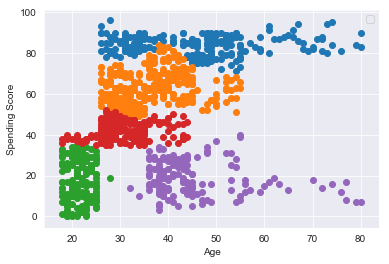

In [143]:
plt.scatter(X[Y_hc==0,0],X[Y_hc==0,1])
plt.scatter(X[Y_hc==1,0],X[Y_hc==1,1])
plt.scatter(X[Y_hc==2,0],X[Y_hc==2,1])
plt.scatter(X[Y_hc==3,0],X[Y_hc==3,1])
plt.scatter(X[Y_hc==4,0],X[Y_hc==4,1])
plt.xlabel('Age')
plt.ylabel('Spending Score')
plt.legend()
plt.show()

In [134]:
## Now for clustering we take annual income and spending score

In [144]:
X = df.iloc[:,[6,7]].values
# X

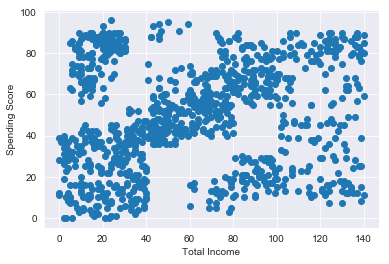

In [145]:
plt.scatter(X[...,0],X[...,1])
plt.xlabel('Total Income')
plt.ylabel('Spending Score')
plt.show()

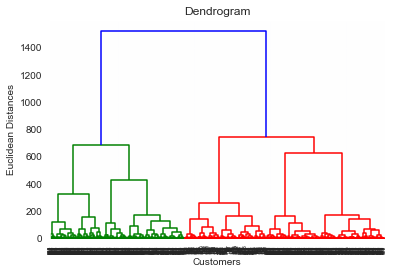

In [146]:
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X,method='ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distances')
plt.show()

In [147]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters=5,affinity='euclidean',linkage='ward')
Y_hc = hc.fit_predict(X)
# Y_hc

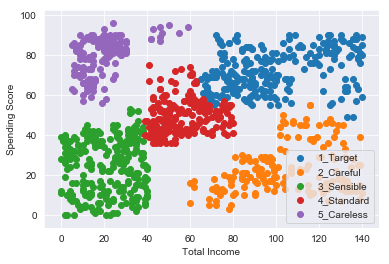

In [148]:
plt.scatter(X[Y_hc==0,0],X[Y_hc==0,1],label='1_Target')
plt.scatter(X[Y_hc==1,0],X[Y_hc==1,1],label='2_Careful')
plt.scatter(X[Y_hc==2,0],X[Y_hc==2,1],label='3_Sensible')
plt.scatter(X[Y_hc==3,0],X[Y_hc==3,1],label='4_Standard')
plt.scatter(X[Y_hc==4,0],X[Y_hc==4,1],label='5_Careless')
plt.xlabel('Total Income')
plt.ylabel('Spending Score')
plt.legend()
plt.show()

In [149]:
df['Target'] = Y_hc
df

,CustomerID,Gender,Age,Marital,address,Retired,Annual Income (k$),Spending Score (1-100),Target
0,1,Male,20,0,9,0,34,13,2
1,2,Male,20,0,7,0,19,15,2
2,3,Female,19,0,24,0,2,31,2
3,5,Female,25,0,12,0,7,28,2
4,6,Female,24,1,9,0,36,9,2
...,...,...,...,...,...,...,...,...,...
995,997,Female,59,0,0,0,42,88,4
996,998,Female,72,0,2,1,46,87,4
997,999,Male,61,0,40,1,43,93,4
998,1000,Male,66,0,18,1,47,91,4


In [150]:
df.Target[df.Target == 0] = '1_Target'
df.Target[df.Target == 1] = '2_Careful'
df.Target[df.Target == 2] = '3_Sensible'
df.Target[df.Target == 3] = '4_Standard'
df.Target[df.Target == 4] = '5_Careless'

In [151]:
df


,CustomerID,Gender,Age,Marital,address,Retired,Annual Income (k$),Spending Score (1-100),Target
0,1,Male,20,0,9,0,34,13,3_Sensible
1,2,Male,20,0,7,0,19,15,3_Sensible
2,3,Female,19,0,24,0,2,31,3_Sensible
3,5,Female,25,0,12,0,7,28,3_Sensible
4,6,Female,24,1,9,0,36,9,3_Sensible
...,...,...,...,...,...,...,...,...,...
995,997,Female,59,0,0,0,42,88,5_Careless
996,998,Female,72,0,2,1,46,87,5_Careless
997,999,Male,61,0,40,1,43,93,5_Careless
998,1000,Male,66,0,18,1,47,91,5_Careless


In [152]:
# gender = {'Male': 1,'Female': 2} 
# df.Gender = [gender[item] for item in df.Gender] 

#Replacing objects for numerical values
df['Gender'].replace(['Female','Male'], [2,1],inplace=True)
df

,CustomerID,Gender,Age,Marital,address,Retired,Annual Income (k$),Spending Score (1-100),Target
0,1,1,20,0,9,0,34,13,3_Sensible
1,2,1,20,0,7,0,19,15,3_Sensible
2,3,2,19,0,24,0,2,31,3_Sensible
3,5,2,25,0,12,0,7,28,3_Sensible
4,6,2,24,1,9,0,36,9,3_Sensible
...,...,...,...,...,...,...,...,...,...
995,997,2,59,0,0,0,42,88,5_Careless
996,998,2,72,0,2,1,46,87,5_Careless
997,999,1,61,0,40,1,43,93,5_Careless
998,1000,1,66,0,18,1,47,91,5_Careless


In [153]:
Xc=df.iloc[:,1:8].values
Xc

array([[ 1, 20,  0, ...,  0, 34, 13],
       [ 1, 20,  0, ...,  0, 19, 15],
       [ 2, 19,  0, ...,  0,  2, 31],
       ...,
       [ 1, 61,  0, ...,  1, 43, 93],
       [ 1, 66,  0, ...,  1, 47, 91],
       [ 1, 65,  1, ...,  1, 46, 89]], dtype=int64)

In [154]:
Yc=df.iloc[:,-1].values
Yc

array(['3_Sensible', '3_Sensible', '3_Sensible', '3_Sensible',
       '3_Sensible', '3_Sensible', '3_Sensible', '3_Sensible',
       '3_Sensible', '3_Sensible', '3_Sensible', '3_Sensible',
       '3_Sensible', '3_Sensible', '3_Sensible', '3_Sensible',
       '3_Sensible', '3_Sensible', '3_Sensible', '3_Sensible',
       '3_Sensible', '3_Sensible', '3_Sensible', '3_Sensible',
       '3_Sensible', '3_Sensible', '3_Sensible', '3_Sensible',
       '3_Sensible', '3_Sensible', '3_Sensible', '3_Sensible',
       '3_Sensible', '3_Sensible', '3_Sensible', '3_Sensible',
       '3_Sensible', '3_Sensible', '3_Sensible', '3_Sensible',
       '3_Sensible', '3_Sensible', '3_Sensible', '3_Sensible',
       '3_Sensible', '3_Sensible', '3_Sensible', '3_Sensible',
       '3_Sensible', '3_Sensible', '4_Standard', '3_Sensible',
       '3_Sensible', '3_Sensible', '3_Sensible', '3_Sensible',
       '3_Sensible', '3_Sensible', '3_Sensible', '3_Sensible',
       '3_Sensible', '3_Sensible', '3_Sensible', '3_Sen

In [156]:
from sklearn.preprocessing import LabelEncoder
ly=LabelEncoder()
Yc=ly.fit_transform(Yc)
Yc

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 2, 2, 3, 2,

In [157]:
ly.classes_

array(['1_Target', '2_Careful', '3_Sensible', '4_Standard', '5_Careless'],
      dtype=object)

In [159]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(Xc,Yc,test_size=0.2,random_state=0)


In [160]:
x_train.shape

(800, 7)

In [161]:
x_test.shape

(200, 7)

In [162]:
x_test

array([[  2,  66,   1, ...,   1,  42,  88],
       [  1,  49,   1, ...,   0, 116,  81],
       [  1,  28,   0, ...,   0,  38,  37],
       ...,
       [  2,  31,   0, ...,   0,  27,  84],
       [  1,  38,   1, ...,   0,  90,  23],
       [  1,  25,   1, ...,   0,  25,  28]], dtype=int64)

In [163]:
import xgboost as xgb
xgb_model = xgb.XGBClassifier(randome_state=0)
xgb_model.fit(x_train,y_train)

[15:09:48] WARNING: D:\Build\xgboost\xgboost-1.3.3.git\src\learner.cc:541: 
Parameters: { randome_state } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[15:09:48] WARNING: D:\Build\xgboost\xgboost-1.3.3.git\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, randome_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', use_label_encoder=True,
              validate_parameters=1, verbosity=None)

In [171]:
# x_test[0]

In [172]:
# y_test[0]

In [168]:
yp=xgb_model.predict(x_test)
yp

array([4, 0, 2, 1, 1, 0, 2, 4, 2, 4, 0, 1, 0, 4, 1, 2, 3, 2, 2, 2, 2, 0,
       2, 2, 0, 0, 2, 2, 0, 2, 0, 4, 1, 0, 3, 0, 0, 3, 0, 4, 4, 4, 1, 4,
       4, 0, 0, 2, 2, 1, 2, 4, 4, 3, 0, 1, 4, 4, 1, 3, 1, 1, 2, 4, 3, 2,
       4, 3, 4, 1, 0, 3, 0, 4, 4, 3, 3, 0, 1, 1, 4, 0, 3, 1, 3, 4, 4, 0,
       0, 0, 3, 0, 4, 4, 1, 0, 1, 2, 3, 1, 0, 0, 2, 3, 2, 1, 1, 0, 0, 4,
       2, 1, 3, 3, 4, 3, 3, 3, 3, 3, 0, 3, 2, 0, 2, 0, 3, 4, 4, 1, 3, 1,
       1, 4, 0, 1, 2, 2, 3, 0, 2, 1, 0, 4, 4, 3, 3, 3, 2, 2, 4, 2, 3, 0,
       1, 4, 0, 3, 0, 3, 1, 1, 1, 0, 4, 3, 3, 4, 3, 2, 0, 0, 2, 0, 3, 0,
       4, 1, 0, 2, 0, 4, 3, 3, 1, 4, 0, 3, 0, 4, 0, 0, 2, 2, 0, 1, 0, 4,
       1, 2])

In [169]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,yp)
cm

array([[51,  1,  0,  1,  0],
       [ 0, 33,  0,  0,  0],
       [ 0,  0, 36,  0,  0],
       [ 0,  0,  0, 38,  0],
       [ 0,  0,  0,  0, 40]], dtype=int64)

In [170]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,yp)*100

99.0

In [151]:
# x_test.data.tolist()

In [152]:
## for explicitly new customer

In [187]:
nc=pd.read_csv('new_Customers.csv')
nc

,CustomerID,Gender,Age,Marital,address,Retired,Annual Income (k$),Spending Score (1-100)
0,1005,Female,23,1,13,0,16,77
1,1006,Female,19,1,14,0,13,39
2,1007,Male,24,1,20,0,7,25
3,1008,Female,22,1,3,0,12,25
4,1009,Female,19,1,27,0,8,5
5,1010,Female,20,0,0,0,25,15
6,1011,Male,20,0,9,0,36,18
7,1012,Female,23,0,14,0,18,37
8,1013,Male,24,1,4,0,39,40
9,1014,Female,21,0,28,0,2,38


In [188]:
nc['Gender'].replace(['Female','Male'], [2,1],inplace=True)

# nc

In [189]:
X_nc=nc.iloc[:,1:8].values
# X_nc

In [190]:
y_np=xgb_model.predict(X_nc)
# y_np

In [191]:
nc['Target'] = y_np
# nc

In [192]:
nc.Target[nc.Target == 0] = '1_Target'
nc.Target[nc.Target == 1] = '2_Standard'
nc.Target[nc.Target == 2] = '3_Careful'
nc.Target[nc.Target == 3] = '4_Sensible'
nc.Target[nc.Target == 4] = '5_Careless'


In [193]:
nc

,CustomerID,Gender,Age,Marital,address,Retired,Annual Income (k$),Spending Score (1-100),Target
0,1005,2,23,1,13,0,16,77,5_Careless
1,1006,2,19,1,14,0,13,39,3_Careful
2,1007,1,24,1,20,0,7,25,3_Careful
3,1008,2,22,1,3,0,12,25,3_Careful
4,1009,2,19,1,27,0,8,5,3_Careful
5,1010,2,20,0,0,0,25,15,3_Careful
6,1011,1,20,0,9,0,36,18,3_Careful
7,1012,2,23,0,14,0,18,37,3_Careful
8,1013,1,24,1,4,0,39,40,4_Sensible
9,1014,2,21,0,28,0,2,38,3_Careful
